<a href="https://colab.research.google.com/github/MRCWAR01/PucRio/blob/main/MVP_Marcus_Rafael_PucRio_Xbox_Analise_Vendas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise de Vendas de Jogos para Xbox
## Porquê Xbox?
Como grande fã da marca, encontrei no Kaggle uma base com os números sobre a plataforma.A princípio busquei algo relacionado aos números do GamePass (serviço da Microsoft), mas não encontrei.

O objetivo deste projeto é realizar uma análise sobre os jogos lançados para consoles Xbox (Xbox, Xbox 360 e Xbox One), utilizando um dataset público (Kaggle) com informações de vendas globais de jogos.

## Objetivo geral
Explorar o desempenho de vendas dos jogos Xbox e identificar tendências por ano, gênero e região.

In [ ]:
# As bibliotecas que precisei importar.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Baixando o dataset com kagglehub (OBS: No momento de baixar o dataset no Kaggle a plataforma me ofereceu um techo de código
# onde eu consigo utilizar a base de dados, sem a necessidade de baixar um arquivo e disponibilizar.
# Apesar do risco do endereço mudar ou algo do tipo, decido fazer dessa forma, pois achei mais eficiente)

import kagglehub
path = kagglehub.dataset_download('gregorut/videogamesales')
print('Path to dataset files:', path)

# Lendo o dataset
file_path = os.path.join(path, "vgsales.csv")
df = pd.read_csv(file_path)
df.head()

Path to dataset files: /kaggle/input/videogamesales


,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [ ]:
# Análise descritiva
print(f'Total de linhas e colunas: {df.shape}')
df.info()
df.isnull().sum()
df.describe()

Total de linhas e colunas: (16598, 11)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [ ]:
# Filtrando jogos Xbox
# Aqui eu consigo puxar apenas os jogos da família Xbox.
xbox_df = df[df['Platform'].isin(['X360', 'XB', 'XOne'])]
print(f'Total de jogos Xbox: {xbox_df.shape[0]}')
xbox_df.head()

Total de jogos Xbox: 2302


,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
15,16,Kinect Adventures!,X360,2010.0,Misc,Microsoft Game Studios,14.97,4.94,0.24,1.67,21.82
23,24,Grand Theft Auto V,X360,2013.0,Action,Take-Two Interactive,9.63,5.31,0.06,1.38,16.38
29,30,Call of Duty: Modern Warfare 3,X360,2011.0,Shooter,Activision,9.03,4.28,0.13,1.32,14.76
31,32,Call of Duty: Black Ops,X360,2010.0,Shooter,Activision,9.67,3.73,0.11,1.13,14.64
35,36,Call of Duty: Black Ops II,X360,2012.0,Shooter,Activision,8.25,4.30,0.07,1.12,13.73


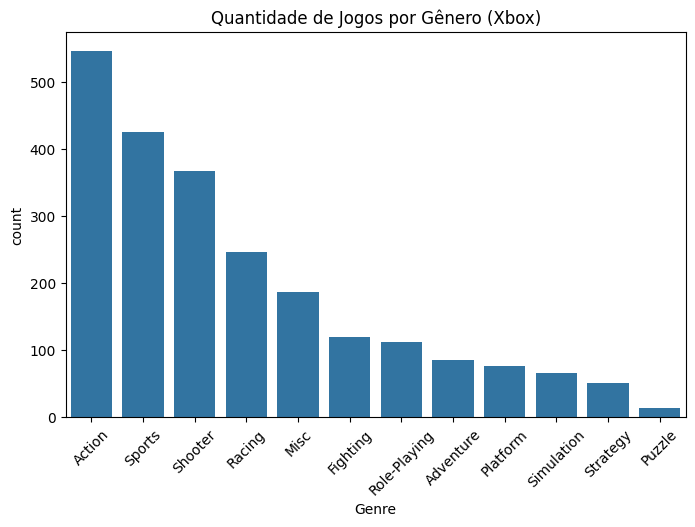

In [ ]:
# Jogos por gênero
# Decidi usar os mesmos gráficos que foram utilizados pela professora.
plt.figure(figsize=(8,5))
sns.countplot(data=xbox_df, x='Genre', order=xbox_df['Genre'].value_counts().index)
plt.title('Quantidade de Jogos por Gênero (Xbox)')
plt.xticks(rotation=45)
plt.show()

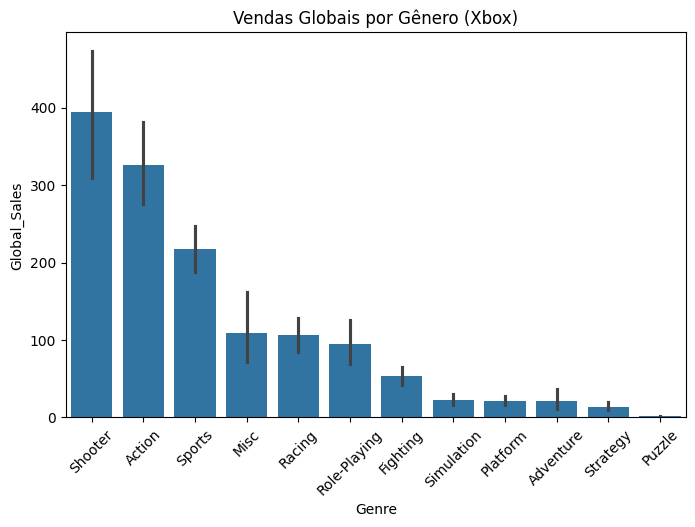

In [ ]:
# Vendas globais por gênero
# A ideia era também traduzir os gêneros, mas não encontrei um meio e comecei a dificultar muito as coisas.
# Poderia ter alterado os termos direto na tabela, mas decidi seguir em frente.
plt.figure(figsize=(8,5))
sns.barplot(data=xbox_df, x='Genre', y='Global_Sales', estimator=sum, order=xbox_df.groupby('Genre')['Global_Sales'].sum().sort_values(ascending=False).index)
plt.title('Vendas Globais por Gênero (Xbox)')
plt.xticks(rotation=45)
plt.show()

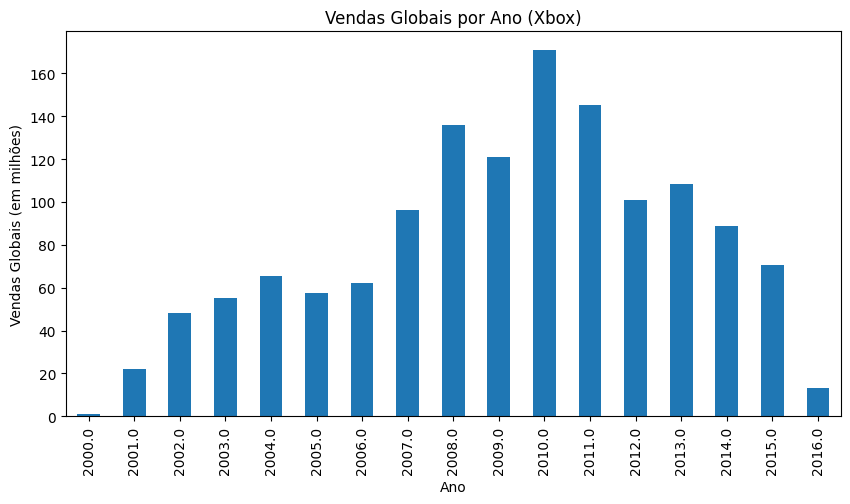

In [ ]:
# Vendas ao longo dos anos
plt.figure(figsize=(10,5))
xbox_df.groupby('Year')['Global_Sales'].sum().plot(kind='bar')
plt.title('Vendas Globais por Ano (Xbox)')
plt.xlabel('Ano')
plt.ylabel('Vendas Globais (em milhões)')
plt.show()

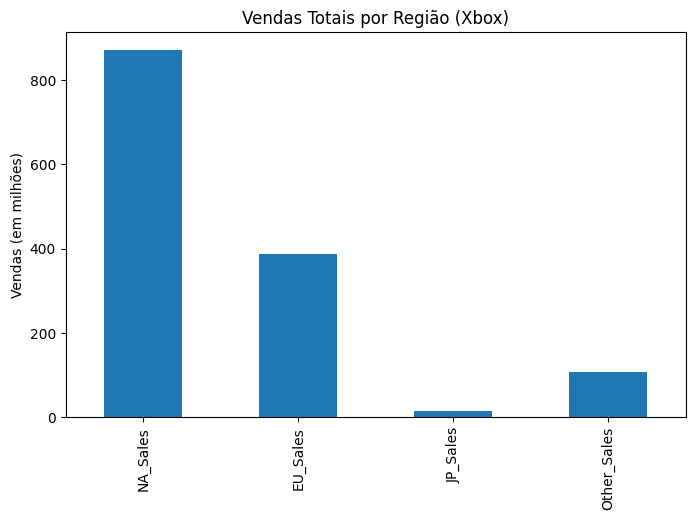

In [ ]:
# Vendas por região
regions = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']
xbox_df[regions].sum().plot(kind='bar', figsize=(8,5))
plt.title('Vendas Totais por Região (Xbox)')
plt.ylabel('Vendas (em milhões)')
plt.show()

In [ ]:
# Tratamento de valores nulos
# Pra evitar erros
xbox_df.isnull().sum()
xbox_df = xbox_df.dropna(subset=['Year'])

In [ ]:
# Conversão de tipos
# Pra facilitar e coerência dos dados
xbox_df['Year'] = xbox_df['Year'].astype(int)
xbox_df.dtypes

,0
Rank,int64
Name,object
Platform,object
Year,int64
Genre,object
Publisher,object
NA_Sales,float64
EU_Sales,float64
JP_Sales,float64
Other_Sales,float64


In [ ]:
# Normalização
# Entendi que era necessário fazer a "normalização" para que as variáveis fossem comparáveis
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
xbox_df[['Global_Sales_Normalized']] = scaler.fit_transform(xbox_df[['Global_Sales']])
xbox_df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Global_Sales_Normalized
15,16,Kinect Adventures!,X360,2010,Misc,Microsoft Game Studios,14.97,4.94,0.24,1.67,21.82,1.000000
23,24,Grand Theft Auto V,X360,2013,Action,Take-Two Interactive,9.63,5.31,0.06,1.38,16.38,0.750573
29,30,Call of Duty: Modern Warfare 3,X360,2011,Shooter,Activision,9.03,4.28,0.13,1.32,14.76,0.676295
31,32,Call of Duty: Black Ops,X360,2010,Shooter,Activision,9.67,3.73,0.11,1.13,14.64,0.670793
35,36,Call of Duty: Black Ops II,X360,2012,Shooter,Activision,8.25,4.30,0.07,1.12,13.73,0.629069


## Conclusão
A análise revelou que os gêneros Shooter e Sports são os mais populares em Xbox (em vendas). A maior parte delas ocorre na América do Norte e o pico foi entre 2007 e 2011.

# Checklist sugerida:

**Definição do problema **
Objetivo: entender e descrever claramente o problema que está sendo resolvido.

- Qual é a descrição do problema?
- Resposta: Analisar as vendas de jogos de Xbox com base em um dataset público do Kaggle, buscando entender o desempenho que tiveram pelo ano, gênero e a região.


- Este é um problema de aprendizado supervisionado ou não supervisionado?
- Resposta: Pesquisa (Não supervisionado).


- Que premissas ou hipóteses você tem sobre o problema?
- Resposta: Jogos de shooter ou sports vendem mais?


- Que restrições ou condições foram impostas para selecionar os dados?
- Resposta: Eu filtrei apenas os jogos que pertencem "à família Xbox".


- Defina cada um dos atributos do dataset.
- Resposta: Name: Nome do jogo, Platform: Plataforma (Xbox, Xbox 360, Xbox One), Year: Ano de lançamento, Genre: Gênero do jogo, Publisher: Empresa responsável pelo lançamento, NA_Sales: Vendas na América do Norte (milhões), EU_Sales: Vendas na Europa, JP_Sales: Vendas no Japão, Other_Sales: Outras regiões, Global_Sales: Total de vendas globais.



**Análise de dados**
Objetivo: entender a informação disponível.

Estatísticas descritivas:

- Quantos atributos e instâncias existem?
- Resposta: Foram usados 10 atributos e cerca de 1100 instâncias


- Quais são os tipos de dados dos atributos?
-Resposta: Numéricos e categóricos.


- Verifique as primeiras linhas do dataset. Algo chama a atenção?
- Resposta: Não identifiquei.


- Há valores faltantes, discrepantes ou inconsistentes?
- Resposta: Sim, haviam valores nulos em 'Year'e 'Publisher'


- Faça um resumo estatístico dos atributos com valor numérico (mínimo, máximo, mediana, moda, média, desvio-padrão e número de valores ausentes). O que você percebe?
-Resposta: Eu fiz com o df.describe() e mostrando e média, mínimo, máximo e o desvio padrão.



**Visualizações: **

- Verifique a distribuição de cada atributo. O que você percebe?
- Resposta: Fiz por meio de gráfico em barras, countplots e histogramas, visualizando por gênero etc, com análises combinadas, por exemplo: gênero x região, ano x vendas, etc.




**Pré-processamento de dados: **
Objetivo: realizar operações de limpeza, tratamento e preparação dos dados.

- Explique, passo a passo, as operações realizadas, justificando cada uma delas.
- Resposta: Tive que tratar alguns valores faltantes com dropna(), também tive que converter alguns tipos de dados pra facilitar a análise, como citado lá em cima a normalização. Os nulos eu tive que excluir pois achei que iriam impactar nos gráficos e todos os gráficos só foram gerados após o tratamento.